In [1]:
#26<=Rollnumber<=50: 
#Task 1: Try the algo on Dataset1 - LabelEncoding of features: and Train test Division 80%-20%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # not used as data is already numerical
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
dataset = pd.read_csv(r"Dataset1.csv")
print("Number of examples and feature:", dataset.shape)
dataset

Number of examples and feature: (14, 5)


,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y
5,S,C,Low,T,N
6,O,C,Normal,T,Y
7,R,M,Normal,F,N
8,R,C,Low,F,Y
9,S,M,High,F,Y


In [4]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique Outlook values: " + end, dataset['Outlook'].unique())

print(start + "\nUnique Temperature values: " + end, dataset['Temp'].unique())

print(start + "\nUnique Humidity values: " + end, dataset['Humidity'].unique())

print(start + "\nUnique Wind values: " + end, dataset['Wind'].unique())

print(start + "\nUnique Play values " + "\033[91m (Play Label): " + end, dataset['Play'].unique())

Unique Outlook values:  ['R' 'O' 'S']

Unique Temperature values:  ['H' 'M' 'C']

Unique Humidity values:  ['Normal' 'High' 'Low']

Unique Wind values:  ['F' 'T']

Unique Play values  (Play Label):  ['N' 'Y']


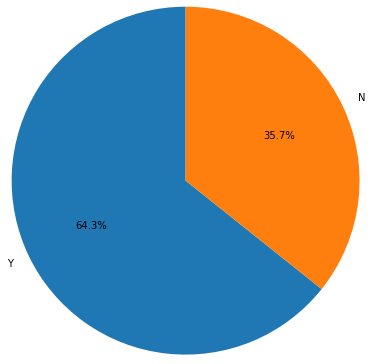

In [5]:
pie_chart = dataset['Play'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2, startangle = 90)
pie_chart.set_ylabel('')
plt.show()

In [6]:

dummy = pd.get_dummies(dataset.iloc[:,:-1])

cols = dataset.columns.tolist()
cols.remove("Play")

dataset = dataset.drop(cols, axis = 1)
dataset = pd.concat([dummy,dataset], axis = 1)

In [7]:
print("\n\nFinal dataset :\n")
dataset.head()



Final dataset :



,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Humidity_High,Humidity_Low,Humidity_Normal,Wind_F,Wind_T,Play
0,0,1,0,0,1,0,0,0,1,1,0,N
1,0,1,0,0,1,0,1,0,0,0,1,N
2,1,0,0,0,1,0,0,0,1,1,0,Y
3,0,0,1,0,0,1,0,0,1,1,0,Y
4,0,0,1,1,0,0,0,0,1,1,0,Y


In [8]:
print("\nLabel\n\n")
labels = dataset['Play']
labels



Label




0     N
1     N
2     Y
3     Y
4     Y
5     N
6     Y
7     N
8     Y
9     Y
10    Y
11    Y
12    Y
13    N
Name: Play, dtype: object

In [9]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(dataset.iloc[:,:-1],labels, test_size = 0.2, random_state = 40)
# set Random state of model equals to your roll number
#my roll number is 40

In [10]:
# creating intsance
gnb = GaussianNB()

# fitting the model or training
gnb.fit(data_train,target_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# testing
target_predict = gnb.predict(data_test)

In [13]:
# Accuracy
Accuracy = accuracy_score(target_test, target_predict)
print("Accuracy:", Accuracy)

Accuracy: 0.6666666666666666


In [14]:

# Confusion Matrix
cm = confusion_matrix(target_test, target_predict)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[2, 0],
       [1, 0]])

In [16]:
# Precision
precision = precision_score(target_test, target_predict, average=None)
print("Precision:\n")
precision

Precision:



array([0.66666667, 0.        ])

In [17]:
# Recall
recall = recall_score(target_test, target_predict, average=None)
print("Recall:\n")
recall

Recall:



array([1., 0.])

In [3]:
#Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and Train test Division 60%-40%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn import datasets
from sklearn import metrics


In [5]:
cancer = datasets.load_breast_cancer()
print("Number of examples and feature:", cancer.data.shape)
dataset = pd.DataFrame(cancer.data)

Number of examples and feature: (569, 30)


In [6]:
print("Features: ", cancer.data)
print("Labels: ", np.unique(cancer.target))


Features:  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
Labels:  [0 1]


In [7]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(cancer.data,
                        cancer.target, test_size = 0.4, random_state = 40) 
#40 roll number

In [8]:
#Create a Classifier
model=MultinomialNB()
# Train the model using the training sets
model.fit(data_train,target_train)

MultinomialNB()

In [9]:

target_pred = model.predict(data_test)

In [10]:
print("Accuracy:",accuracy_score(target_test, target_pred))

Accuracy: 0.8947368421052632


In [11]:
confusion_matrix(target_test, target_pred)

array([[ 60,  20],
       [  4, 144]])

Confusion matrix:
[[ 60  20]
 [  4 144]]


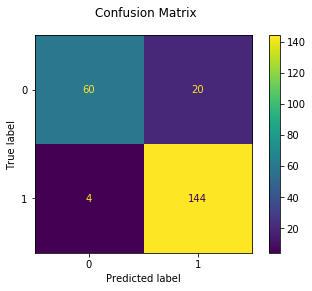

In [12]:
from sklearn.metrics import plot_confusion_matrix
disp = metrics.plot_confusion_matrix(model, data_test, target_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [50]:
pip install --upgrade scikit-learn


     |████████████████████████████████| 22.3 MB 4.6 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
disp = metrics.plot_confusion_matrix(model, data_test, target_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

NameError: name 'model' is not defined